In [1]:
import csv
import numpy as np
import os
import pandas as pd

In [5]:
csv_list = [each for each in os.listdir(os.curdir) if each.endswith('.csv')]

In [2]:
age_train = pd.read_csv('age_train.csv',header=None)
age_train.columns = ['uId','age_group']
app_info = pd.read_csv('app_info.csv',header=None)
app_info.columns = ['appId','category']
user_basic_info = pd.read_csv('user_basic_info.csv',header=None)
user_basic_info.columns = ['uId','gender','city','prodName',
                           'ramCapacity','ramLeftRation','romCapacity',
                           'romLeftRation','color','fontSize',
                           'ct','carrier','os']
user_app_actived = pd.read_csv('user_app_actived.csv',header=None)
user_app_actived.columns = ['uId','appId']
user_behavior_info = pd.read_csv('user_behavior_info.csv',header=None)
user_behavior_info.columns = ['uId','bootTimes','AFuncTimes','BFuncTimes',
                              'CFuncTimes','DFuncTimes','EFuncTimes',
                              'FFuncTimes','FFuncSum']

In [4]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # 我们假设这不是一个df，而是一个 Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # 将 bytes 转化成 megabytes
    return "{:03.2f} MB".format(usage_mb)

def optimize_mem(sll):
    print(mem_usage(sll))
    sll_int = sll.select_dtypes(include=['int']) # 用 DataFrame.select_dtypes 来选中表中的 int数据
    converted_int = sll_int.apply(pd.to_numeric,downcast='unsigned') # 用pd.to_numeric()来降低我们的数据类型

    compare_ints = pd.concat([sll_int.dtypes,converted_int.dtypes],axis=1)
    compare_ints.columns = ['before','after']
    
    sll_float = sll.select_dtypes(include=['float'])
    converted_float = sll_float.apply(pd.to_numeric,downcast='float')

    compare_floats = pd.concat([sll_float.dtypes,converted_float.dtypes],axis=1)
    compare_floats.columns = ['before','after']
    
    sll[converted_int.columns] = converted_int
    sll[converted_float.columns] = converted_float

    print(mem_usage(sll))
    return sll

In [3]:
print(age_train.info(memory_usage='deep'))
age_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010000 entries, 0 to 2009999
Data columns (total 2 columns):
uId          int64
age_group    int64
dtypes: int64(2)
memory usage: 30.7 MB
None


,uId,age_group
count,2.010000e+06,2.010000e+06
mean,2.458389e+06,3.512438e+00
std,6.511947e+05,1.254284e+00
min,1.000001e+06,1.000000e+00
25%,1.973742e+06,3.000000e+00
50%,2.498720e+06,3.000000e+00
75%,3.008418e+06,4.000000e+00
max,3.512500e+06,6.000000e+00


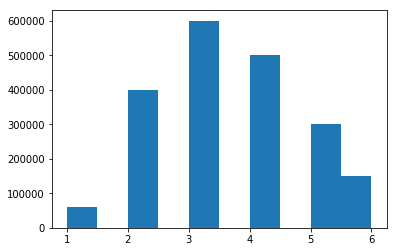

In [9]:
import matplotlib.pyplot as plt
plt.hist(age_train.age_group)
plt.show()

In [6]:
print(app_info.info(memory_usage='deep'))
app_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188864 entries, 0 to 188863
Data columns (total 2 columns):
appId       188864 non-null object
category    188864 non-null object
dtypes: object(2)
memory usage: 28.0 MB
None


,appId,category
0,a006,商务
1,a006,实用工具
2,a0015,影音娱乐
3,a0016,实用工具
4,a0019,动作射击


In [7]:
print(user_app_actived.info(memory_usage='deep'))
user_app_actived.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512500 entries, 0 to 2512499
Data columns (total 2 columns):
uId      int64
appId    object
dtypes: int64(1), object(1)
memory usage: 1.1 GB
None


,uId,appId
0,1000008,a00105157#a00109386#a00134746#a0013952#a001451...
1,1000010,a00102782#a00107077#a00109386#a00134746#a00136...
2,1000011,a00158535#a00163116#a00170432#a00187480#a00224...
3,1000013,a00109386#a0011601#a0012768#a00136287#a0014516...
4,1000014,a00109386#a0011894#a0013059#a00134840#a0013578...


In [8]:
print(user_basic_info.info(memory_usage='deep'))
user_basic_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512500 entries, 0 to 2512499
Data columns (total 13 columns):
uId              int64
gender           int64
city             object
prodName         object
ramCapacity      float64
ramLeftRation    float64
romCapacity      float64
romLeftRation    float64
color            object
fontSize         float64
ct               object
carrier          object
os               float64
dtypes: float64(6), int64(2), object(5)
memory usage: 975.0 MB
None


,uId,gender,city,prodName,ramCapacity,ramLeftRation,romCapacity,romLeftRation,color,fontSize,ct,carrier,os
0,1000001,0,c00145,p00169,3.0,0.43,32.0,0.46,皓月银,1.15,4g,China_Mobile,8.0
1,1000002,1,c0043,p0022,NaN,0.26,NaN,0.59,渐变黑,1.00,wifi,China_Mobile,9.0
2,1000004,1,c00281,p0013,3.0,0.36,32.0,0.09,幻海蓝,1.00,4g#wifi,China_Mobile,8.0
3,1000006,0,c00359,p0045,2.0,0.19,16.0,0.42,灰色,NaN,NaN,China_Mobile,6.0
4,1000007,1,c006,p0097,6.0,0.20,137.0,0.50,宝石蓝,1.00,4g#wifi,China_Telecom,9.0


In [9]:
print(user_behavior_info.info(memory_usage='deep'))
user_behavior_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512500 entries, 0 to 2512499
Data columns (total 9 columns):
uId           int64
bootTimes     int64
AFuncTimes    float64
BFuncTimes    float64
CFuncTimes    float64
DFuncTimes    float64
EFuncTimes    float64
FFuncTimes    float64
FFuncSum      int64
dtypes: float64(6), int64(3)
memory usage: 172.5 MB
None


,uId,bootTimes,AFuncTimes,BFuncTimes,CFuncTimes,DFuncTimes,EFuncTimes,FFuncTimes,FFuncSum
0,1000001,108,0.0,0.00,1.00,0.07,0.0,0.0,3319
1,1000002,14,0.0,0.17,4.93,1.23,3.9,1.0,245
2,1000003,13,1.0,0.00,7.73,3.00,1.7,0.0,5987
3,1000004,57,0.0,0.03,1.37,0.63,0.0,0.0,7460
4,1000005,0,0.0,0.00,0.00,0.00,0.0,0.0,0


In [3]:
user_basic_info = user_basic_info.dropna()
app_info = app_info.dropna()
age_train = age_train.dropna()
user_behavior_info = user_behavior_info.dropna()
user_app_actived = user_app_actived.dropna()

app_info = pd.get_dummies(app_info,columns=['category'])
del user_basic_info['city']
user_basic_info = pd.get_dummies(user_basic_info,columns=['prodName','color','ct','carrier'])
# user_basic_info = pd.get_dummies(user_basic_info,columns=['city','prodName','color','ct','carrier'])
# todo: city 和 prodName 维度太高，估计比较稀疏，要把数目少的类别归为一个other类。
# city这个特征作用不大，而且有300多维，可能可以删了

# age_train = optimize_mem(age_train)
# app_info = optimize_mem(app_info)
# user_basic_info = optimize_mem(user_basic_info)
# user_behavior_info = optimize_mem(user_behavior_info)

df = user_behavior_info
float_col = [each for each in df.columns if df[each].dtype=='float']
normalize_col = float_col + ['bootTimes','FFuncSum']
user_behavior_info[normalize_col] = df[normalize_col].apply(lambda x: (x - np.mean(x)) / np.std(x))

df = user_basic_info
float_col = [each for each in df.columns if df[each].dtype=='float']
user_basic_info[float_col] = df[float_col].apply(lambda x: (x - np.mean(x)) / np.std(x))

In [9]:
app_info_dict = {}
for each in app_info.values:
    app = each[0]
    cat = each[1:]
    if app in app_info.keys():
        app_info_dict[app] += cat
    else:
        app_info_dict[app] = cat
        
    
def f(x):
    x = x.split('#')
    r = []
    for each in x:
        if each in app_info_dict.keys():
            r.append(app_info_dict[each])
        else:
            r.append(np.array([0]*40))
    return sum(r)
    
user_app_actived['app_total_categery'] = user_app_actived['appId'].apply(f)

In [10]:
np.where(np.isnan(user_app_actived))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [12]:
user_app_actived.head()

,uId,appId,app_total_categery
0,1000008,a00105157#a00109386#a00134746#a0013952#a001451...,"[0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 1, ..."
1,1000010,a00102782#a00107077#a00109386#a00134746#a00136...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, ..."
2,1000011,a00158535#a00163116#a00170432#a00187480#a00224...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,1000013,a00109386#a0011601#a0012768#a00136287#a0014516...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, ..."
4,1000014,a00109386#a0011894#a0013059#a00134840#a0013578...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."


In [13]:
user_app_actived['app_numbers'] = user_app_actived['appId'].apply(lambda x:len(x.split('#')))
user_app_actived['app_average_categery'] = user_app_actived['app_total_categery'].apply(lambda x:x/sum(x))
# user_app_actived['topk_app'] = user_app_actived['app_total_categery'].apply(lambda x:x/sum(x))
# todo: 需要看app的分布直方图，选取topK或者top m 到 n。

In [16]:
temp = user_app_actived[['uId','app_average_categery']].values
temp1 = []
for i in  range(len(temp)):
    temp1.append(np.insert(temp[i][1],0,temp[i][0]))
temp1 = np.array(temp1)
temp1 = pd.DataFrame(temp1)
temp1.columns = ['uId'] + ['categery_'+str(i) for i in range(40)]
temp1['uId'] = temp1['uId'].astype('int64')
temp1[['categery_'+str(i) for i in range(40)]] = temp1[['categery_'+str(i) for i in range(40)]].astype('float64')
 
user_app_actived = pd.merge(user_app_actived,temp1, on=['uId'], how='inner')
del user_app_actived['app_total_categery']
del user_app_actived['app_average_categery']
del user_app_actived['appId']

In [18]:
# print(user_app_actived.info(memory_usage='deep'))

In [19]:
len(age_train)

2010000

In [20]:
join_data = pd.merge(age_train,user_behavior_info, on=['uId'], how='inner')
join_data = pd.merge(join_data,user_basic_info,on=['uId'],how='inner')
join_data = pd.merge(join_data,user_app_actived,on=['uId'],how='inner')
join_data.dropna()

In [21]:
print(join_data.info(memory_usage='deep'))
print(len(join_data)/2010000)
join_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370640 entries, 0 to 1370639
Columns: 318 entries, uId to categery_39
dtypes: float64(54), int64(4), uint8(260)
memory usage: 956.8 MB
None
0.681910447761194


,uId,age_group,bootTimes,AFuncTimes,BFuncTimes,CFuncTimes,DFuncTimes,EFuncTimes,FFuncTimes,FFuncSum,...,categery_30,categery_31,categery_32,categery_33,categery_34,categery_35,categery_36,categery_37,categery_38,categery_39
0,1000001,4,3.133035,-0.524734,-0.109986,-0.080571,-0.223583,-0.229489,-0.167348,-0.096929,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.050000
1,1000015,5,-0.300570,-0.524734,-0.109986,-0.210677,-0.217512,-0.229489,-0.167348,0.111647,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.111111
2,1000023,2,-0.550937,-0.524734,-0.109986,-0.214701,-0.217512,-0.229489,-0.167348,-0.134224,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076923,0.000000,0.000000
3,1000025,4,2.739601,-0.524734,0.040552,0.317792,-0.112282,-0.052064,-0.167348,-0.134224,...,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.057692,0.038462,0.192308
4,1000029,4,-0.193270,0.712448,-0.109986,-0.071182,-0.102164,0.217400,-0.167348,-0.129280,...,0.0,0.0,0.0,0.046875,0.0,0.0,0.0,0.125000,0.000000,0.078125


In [ ]:
join_data.values.shape

In [ ]:
for each in join_data.columns:
    if join_data[each].dtype == 'object':
        print(each)

In [49]:
import torch
torch.optim.Adam()

TypeError: __init__() missing 1 required positional argument: 'params'